# Data Science for Cycling #1 - How To Read GPX Strava Routes With Python
- Notebook 1/6
- Make sure to have `gpxpy` installed:
<br>

```
pip install gpxpy
```

- Let's import the libraries and tweak Matplotlib's default stylings:

In [1]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

- You can read GPX files with Python's context manager syntax:

In [3]:
with open('../src_code/Zg288.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

- It's a specific GPX object:

In [10]:
gpx

GPX(tracks=[GPXTrack(name='Zg288', segments=[GPXTrackSegment(points=[...])])])

- Get the number of data points (number of times geolocation was taken):

In [22]:
gpx.get_track_points_no()

835

- Get the minimum and maximum altitudes:

In [17]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=113.96000000000001, maximum=239.16)

- Get the number of meters of uphil and downhil ride
- It's a roundtrip, so the numbers should be almost identical

In [18]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=295.7459999999997, downhill=295.7260000000002)

- You can dump the entire GPX file to XML
- Here are the first 1000 characters:

In [9]:
gpx.to_xml()[:1000]

'<?xml version="1.0" encoding="UTF-8"?>\n<gpx xmlns="http://www.topografix.com/GPX/1/1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd" version="1.1" creator="StravaGPX">\n  <metadata>\n    <name>Zg288</name>\n    <author>\n      <name>Dario Radečić</name>\n      <link href="https://www.strava.com/athletes/29475689">\n      </link>\n    </author>\n    <copyright author="OpenStreetMap contributors">\n      <year>2020</year>\n      <license>https://www.openstreetmap.org/copyright</license>\n    </copyright>\n    <link href="https://www.strava.com/routes/2867394556159395224">\n    </link>\n  </metadata>\n  <trk>\n    <name>Zg288</name>\n    <link href="https://www.strava.com/routes/2867394556159395224">\n    </link>\n    <type>Ride</type>\n    <trkseg>\n      <trkpt lat="45.77248" lon="15.95804">\n        <ele>113.96000000000001</ele>\n      </trkpt>\n      <trkpt lat="45.77277" lon="15.

<br>

## Basic analysis
- There's only one track available in the file
- Access it with Python's list indexing syntax:

In [11]:
gpx.tracks[0]

GPXTrack(name='Zg288', segments=[GPXTrackSegment(points=[...])])

- The track has only one segment - access it the same way:

In [12]:
gpx.tracks[0].segments[0]

GPXTrackSegment(points=[...])

- The segment has 835 data points
- Here are the first 10:

In [23]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(45.77248, 15.95804, elevation=113.96000000000001),
 GPXTrackPoint(45.77277, 15.959090000000002, elevation=115.82000000000001),
 GPXTrackPoint(45.77327000046602, 15.958795002593812, elevation=116.15),
 GPXTrackPoint(45.773770000000006, 15.9585, elevation=116.12000000000002),
 GPXTrackPoint(45.77423500296469, 15.95933499290041, elevation=115.98000000000002),
 GPXTrackPoint(45.7747, 15.960170000000002, elevation=115.10000000000001),
 GPXTrackPoint(45.77487000000001, 15.960220000000001, elevation=115.25),
 GPXTrackPoint(45.77533000042586, 15.960000001712027, elevation=116.14),
 GPXTrackPoint(45.77579, 15.959780000000002, elevation=116.07000000000001),
 GPXTrackPoint(45.776320000000005, 15.959510000000002, elevation=115.78)]

- Let's now extract all dat apoints
- Store latitude, longitude, and elevation as a list of dicts

In [24]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [25]:
route_info[:3]

[{'latitude': 45.77248,
  'longitude': 15.95804,
  'elevation': 113.96000000000001},
 {'latitude': 45.77277,
  'longitude': 15.959090000000002,
  'elevation': 115.82000000000001},
 {'latitude': 45.77327000046602,
  'longitude': 15.958795002593812,
  'elevation': 116.15}]

- Convert it to Pandas DataFrame for faster and easier analysis

In [26]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,45.772480,15.958040,113.96
1,45.772770,15.959090,115.82
2,45.773270,15.958795,116.15
3,45.773770,15.958500,116.12
4,45.774235,15.959335,115.98


- Save it to CSV for later use:

In [37]:
route_df.to_csv('../data/route_df.csv', index=False)

<br>

## Basic visualization
- You can use matplotlib to visualize all data points
- It won't show the map, but you should still see how the route looks like:

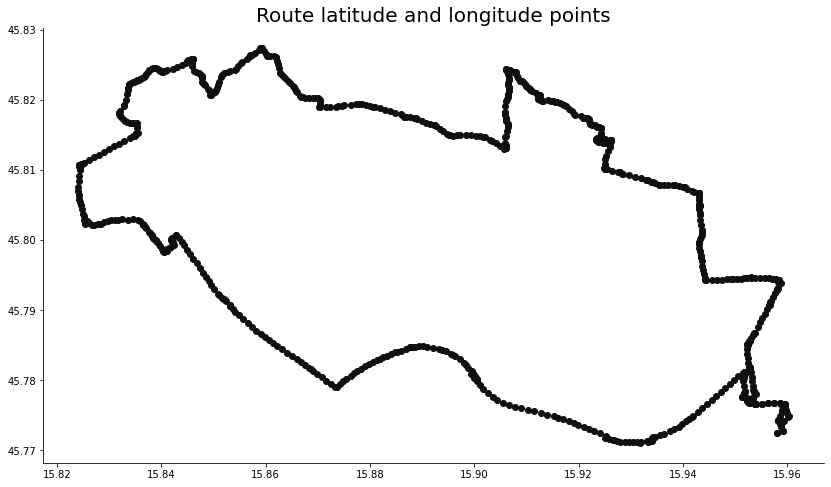

In [35]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

- You'll see in the following notebook how to visualize the route on a map with Folium